In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings 

warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")



Processing data for temperature: 10C
Processing directory: CHG_10C
Processing directory: CpG_10C
Processing directory: CHH_10C


<Figure size 1000x800 with 0 Axes>

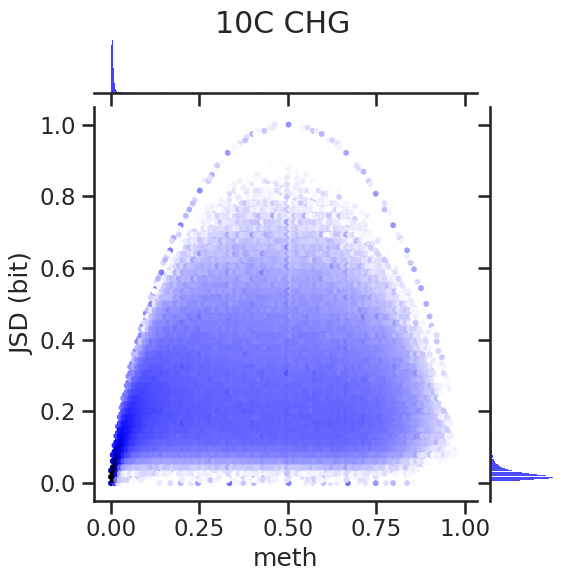

<Figure size 1000x800 with 0 Axes>

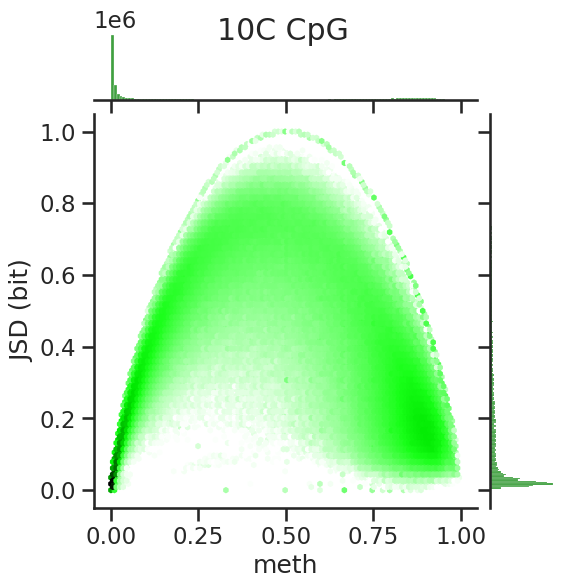

<Figure size 1000x800 with 0 Axes>

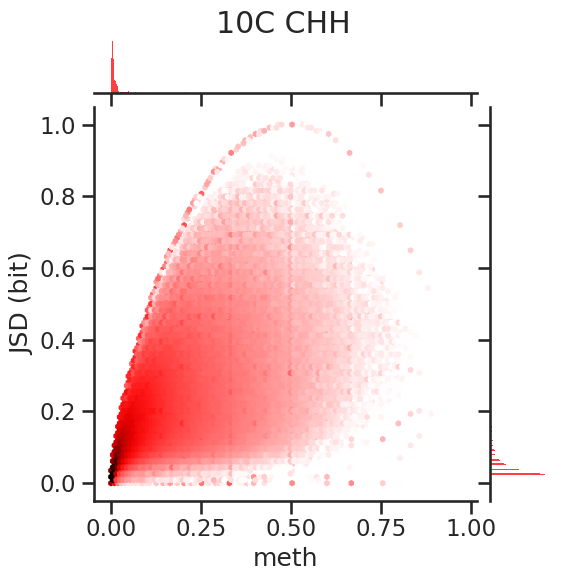


Processing data for temperature: 16C
Processing directory: CHG_16C
Processing directory: CpG_16C
Processing directory: CHH_16C


<Figure size 1000x800 with 0 Axes>

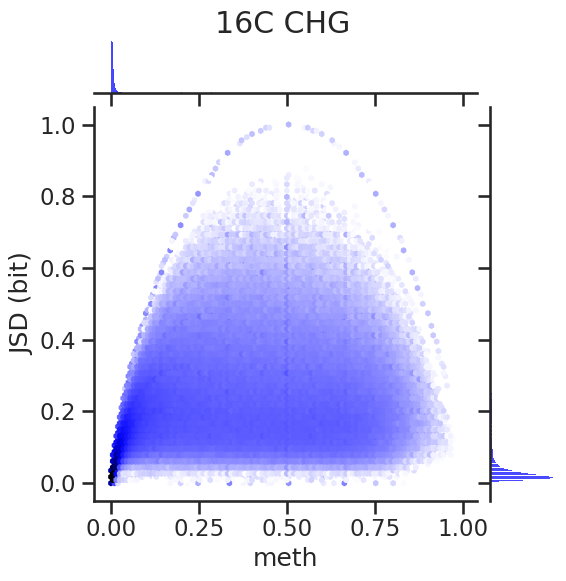

<Figure size 1000x800 with 0 Axes>

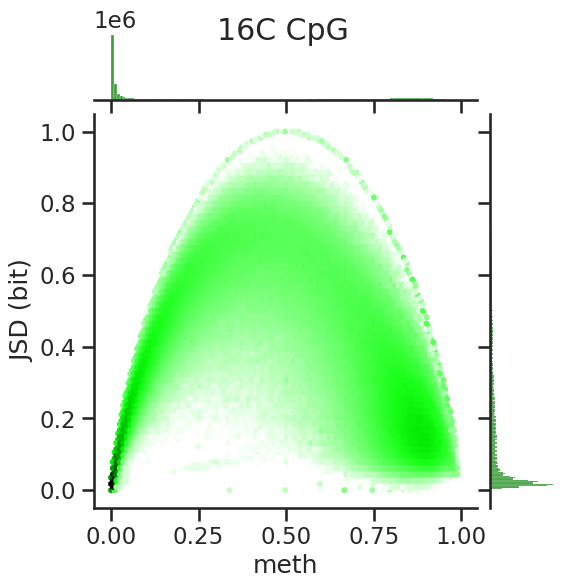

<Figure size 1000x800 with 0 Axes>

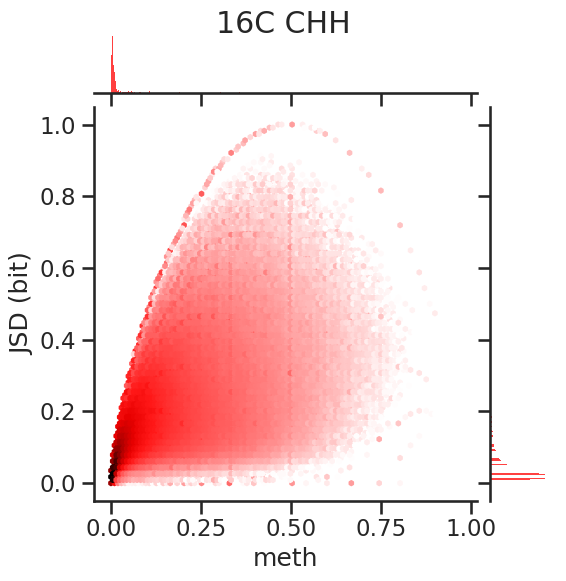


Processing data for temperature: 22C
Processing directory: CHG_22C
Processing directory: CpG_22C
Processing directory: CHH_22C


<Figure size 1000x800 with 0 Axes>

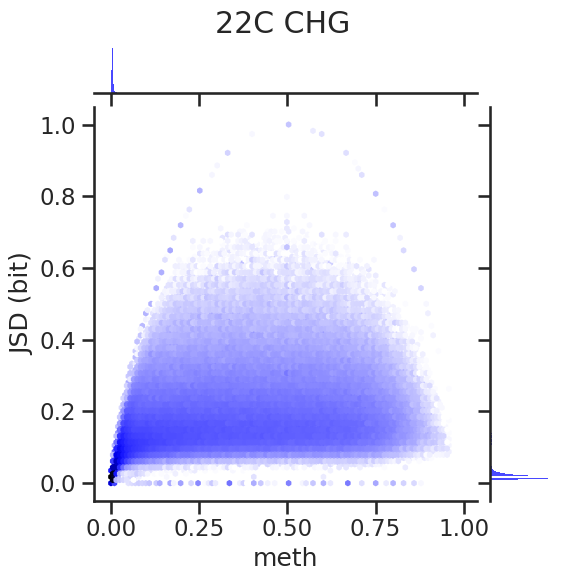

<Figure size 1000x800 with 0 Axes>

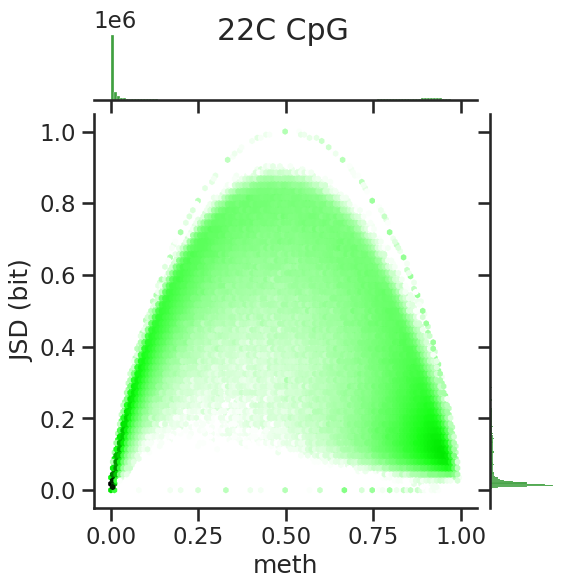

<Figure size 1000x800 with 0 Axes>

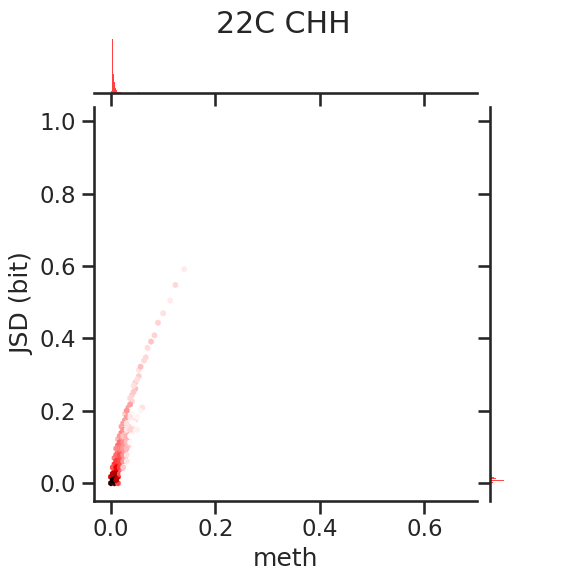

In [57]:
import pandas as pd
import os
from concurrent.futures import ProcessPoolExecutor
import matplotlib.pyplot as plt
import seaborn as sns

def load_data(file_path):
  
    with open(file_path, 'r') as f:
        for line in f:
            if line.startswith('#'):
                header_line = line[1:].strip()
                columns = header_line.split('\t')
                break
        else:
            raise ValueError(f"No header line found in {file_path}")
    
    df = pd.read_csv(file_path, sep='\t', header=None, names=columns, comment='#')
    
    if 'Me' not in df.columns or 'Un' not in df.columns:
        raise ValueError(f"'Me' or 'Un' columns not found in {file_path}")

    # Meth%
    df['meth'] = df['Me'] / (df['Me'] + df['Un'])
    
    df = df[(df['meth'] > 0) & (df['meth'] < 1)]

    return df

base_path = "/shares/grossniklaus.botinst.uzh/dkt/projects/meth1001_code_DKT/analysis/18_jsd_temp/output"


temp_dirs = ['CHG_10C', 'CpG_10C', 'CHH_10C',
             'CHG_16C', 'CpG_16C', 'CHH_16C',
             'CHG_22C', 'CpG_22C', 'CHH_22C']


def process_single_file(file_path):
    processed_data = load_data(file_path)
    
    if "CHG" in file_path:
        return 'CHG', processed_data
    elif "CpG" in file_path:
        return 'CpG', processed_data
    elif "CHH" in file_path:
        return 'CHH', processed_data
    else:
        return 'Unknown', processed_data  

def process_files(directory):
    data_dict = {'CHG': [], 'CpG': [], 'CHH': []}
    
    dir_path = os.path.join(base_path, directory)
    
    if not os.path.isdir(dir_path):
        print(f"Directory {dir_path} does not exist. Skipping.")
        return data_dict
    
    file_paths = [os.path.join(dir_path, file_name) 
                  for file_name in os.listdir(dir_path) if file_name.endswith('.txt')]
    
    if not file_paths:
        print(f"No .txt files found in {dir_path}. Skipping.")
        return data_dict
    
    with ProcessPoolExecutor(max_workers=12) as executor:  
        results = executor.map(process_single_file, file_paths)
    
    for category, processed_data in results:
        if category in data_dict:
            data_dict[category].append(processed_data)
        else:
            print(f"Unknown category '{category}' in file {file_path}. Skipping.")
    
    for key in data_dict:
        if data_dict[key]:  
            data_dict[key] = pd.concat(data_dict[key], ignore_index=True)
        else:
            data_dict[key] = pd.DataFrame()  
    
    return data_dict


def plot_phase_plane(data, color, title):
    if data.empty:
        print(f"No data available for {title}. Skipping plot.")
        return
    
    if 'JSD_bit_' not in data.columns:
        print(f"'JSD_bit_' column not found in data for {title}. Skipping plot.")
        return
    
    data.rename(columns={'JSD_bit_': 'JSD (bit)'}, inplace=True)
    
    sns.set(style='ticks')
    sns.set_context('talk')
    
    BINS = 'log'
    GRIDSIZE = 100
    MINCNT = 10
    
    plt.figure(figsize=(10, 8))
    g = sns.jointplot(x='meth', y='JSD (bit)', data=data, kind='hex',
                      color=color, joint_kws=dict(gridsize=GRIDSIZE, bins=BINS, mincnt=MINCNT))
    plt.suptitle(title)
    plt.show()

for temp in ['10C', '16C', '22C']:
    print(f"\nProcessing data for temperature: {temp}")
    results = {}
    for context in ['CHG', 'CpG', 'CHH']:
        dir_name = f"{context}_{temp}"
        print(f"Processing directory: {dir_name}")
        context_data = process_files(dir_name)
        
        if context in context_data:
            results[context] = context_data[context]
        else:
            print(f"No data found for context {context} in directory {dir_name}.")
    
    # Plotting
    for context, color in zip(['CHG', 'CpG', 'CHH'], ['blue', 'green', 'red']):
        title = f"{temp} {context}"
        if context in results:
            plot_phase_plane(results[context], color, title)
        else:
            print(f"No data available to plot for {title}.")



Processing data for temperature: 10C
Processing directory: CHG_10C
Processing directory: CpG_10C
Processing directory: CHH_10C


/sctmp/eharpu/ipykernel_547206/1509108764.py:97: UserWarning: Ignoring `ax`; jointplot is a figure-level function.
  sns.jointplot(x='meth', y='JSD (bit)', data=data, kind='hex',
/sctmp/eharpu/ipykernel_547206/1509108764.py:97: UserWarning: Ignoring `ax`; jointplot is a figure-level function.
  sns.jointplot(x='meth', y='JSD (bit)', data=data, kind='hex',
/sctmp/eharpu/ipykernel_547206/1509108764.py:97: UserWarning: Ignoring `ax`; jointplot is a figure-level function.
  sns.jointplot(x='meth', y='JSD (bit)', data=data, kind='hex',



Processing data for temperature: 16C
Processing directory: CHG_16C
Processing directory: CpG_16C
Processing directory: CHH_16C


/sctmp/eharpu/ipykernel_547206/1509108764.py:97: UserWarning: Ignoring `ax`; jointplot is a figure-level function.
  sns.jointplot(x='meth', y='JSD (bit)', data=data, kind='hex',
/sctmp/eharpu/ipykernel_547206/1509108764.py:97: UserWarning: Ignoring `ax`; jointplot is a figure-level function.
  sns.jointplot(x='meth', y='JSD (bit)', data=data, kind='hex',
/sctmp/eharpu/ipykernel_547206/1509108764.py:97: UserWarning: Ignoring `ax`; jointplot is a figure-level function.
  sns.jointplot(x='meth', y='JSD (bit)', data=data, kind='hex',



Processing data for temperature: 22C
Processing directory: CHG_22C
Processing directory: CpG_22C
Processing directory: CHH_22C


/sctmp/eharpu/ipykernel_547206/1509108764.py:97: UserWarning: Ignoring `ax`; jointplot is a figure-level function.
  sns.jointplot(x='meth', y='JSD (bit)', data=data, kind='hex',
/sctmp/eharpu/ipykernel_547206/1509108764.py:97: UserWarning: Ignoring `ax`; jointplot is a figure-level function.
  sns.jointplot(x='meth', y='JSD (bit)', data=data, kind='hex',
/sctmp/eharpu/ipykernel_547206/1509108764.py:97: UserWarning: Ignoring `ax`; jointplot is a figure-level function.
  sns.jointplot(x='meth', y='JSD (bit)', data=data, kind='hex',


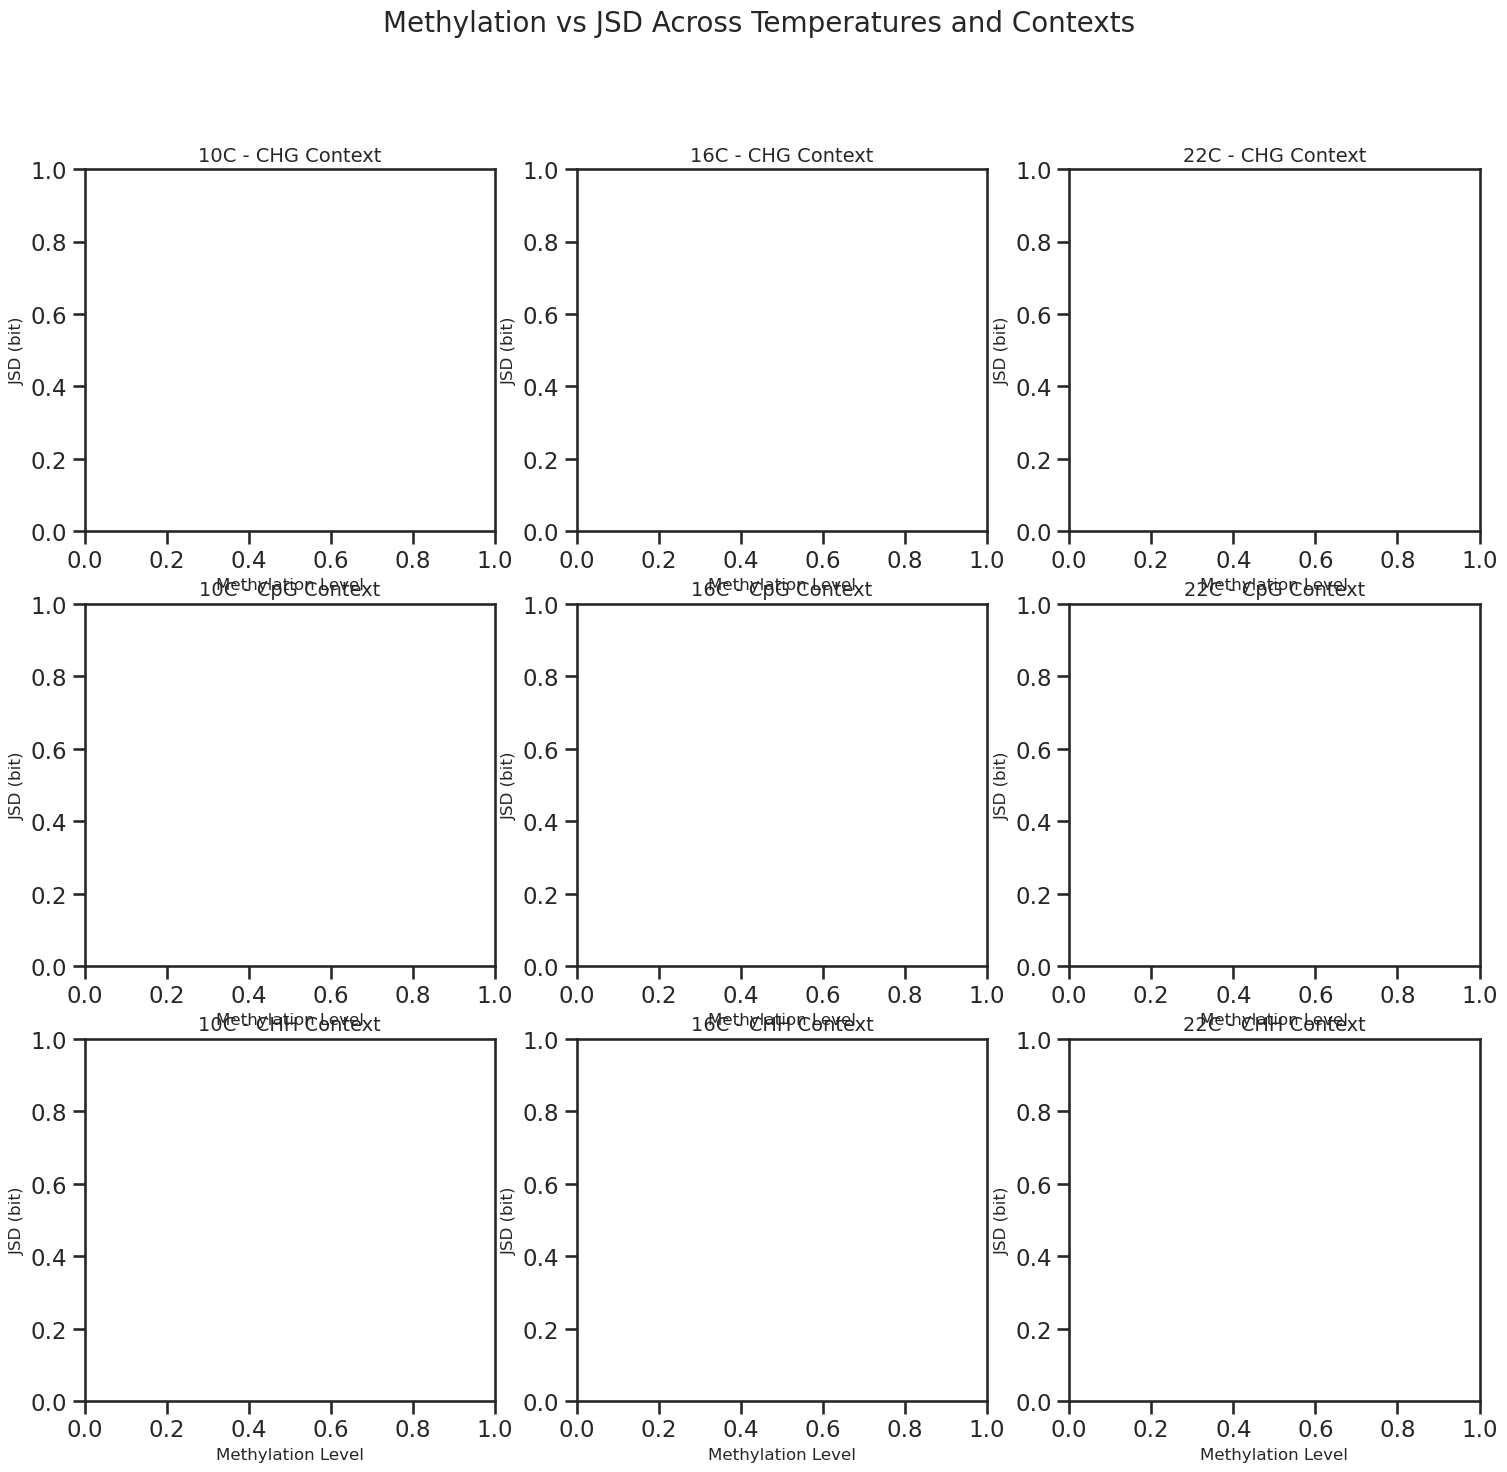

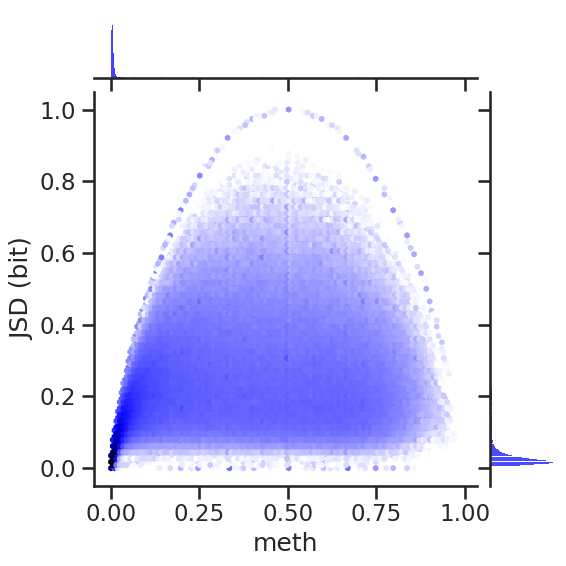

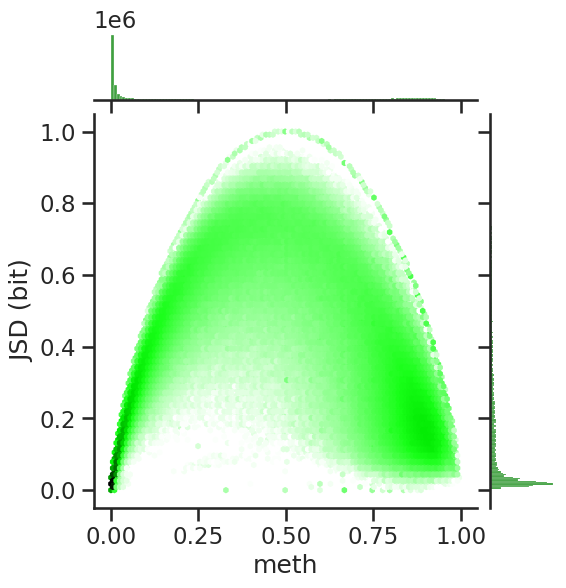

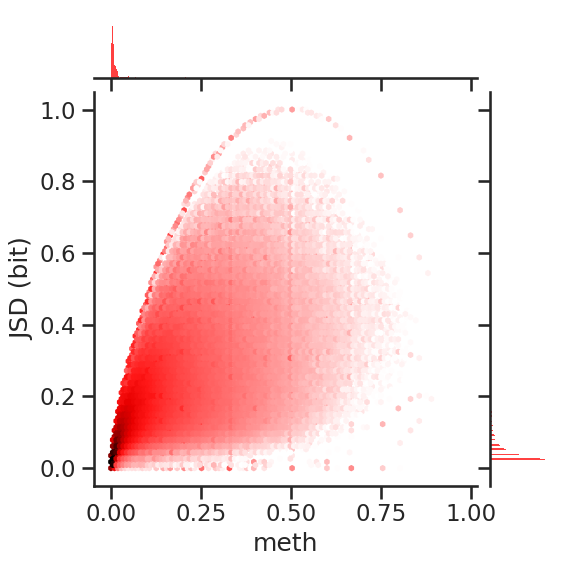

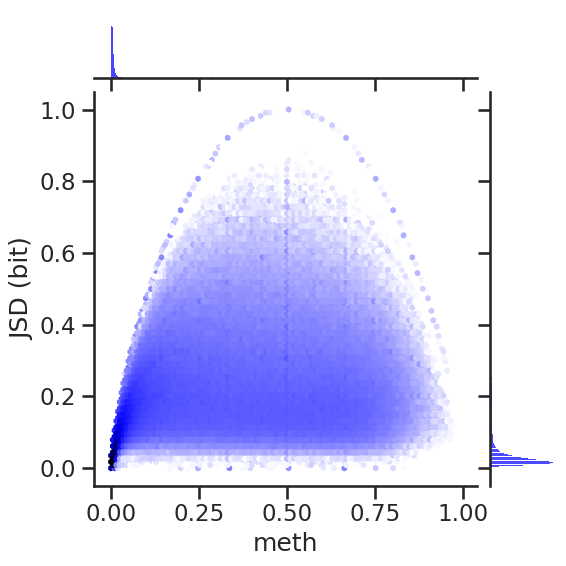

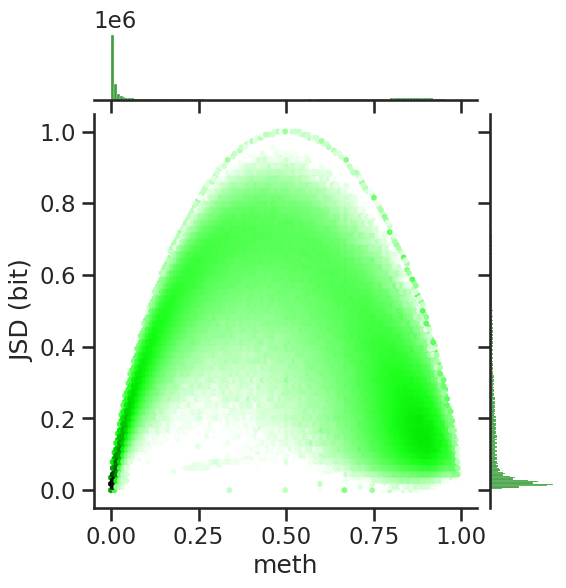

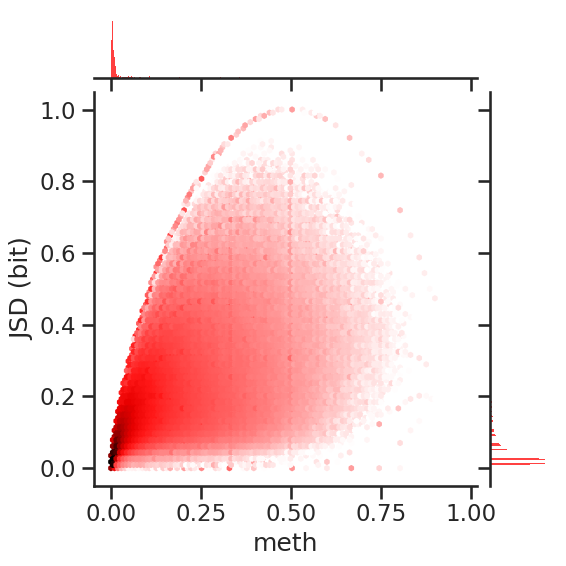

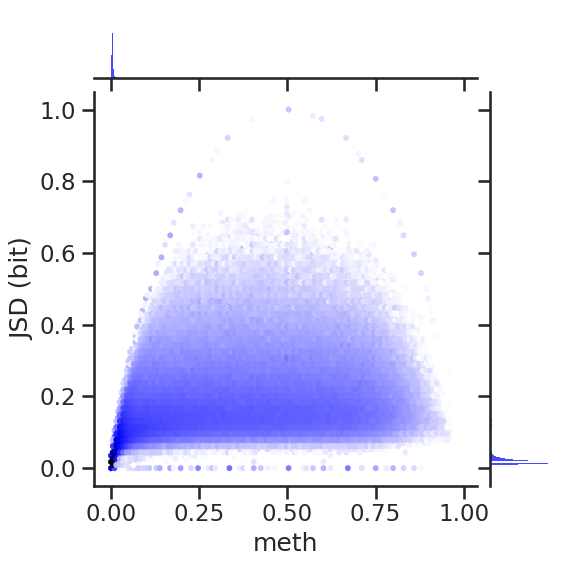

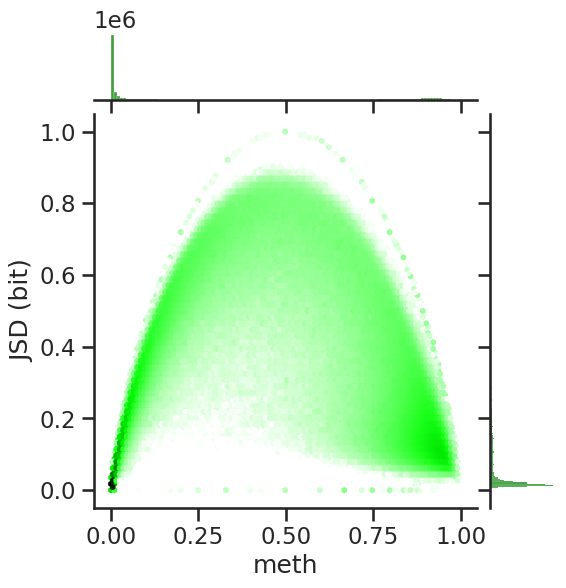

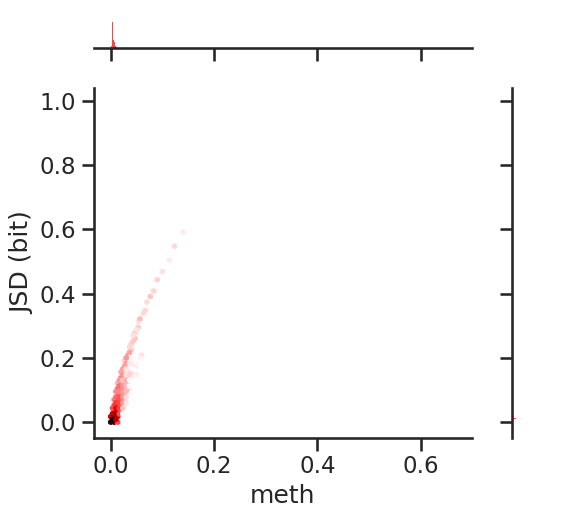

In [65]:
import pandas as pd
import os
from concurrent.futures import ProcessPoolExecutor
import matplotlib.pyplot as plt
import seaborn as sns

def load_data(file_path):
    with open(file_path, 'r') as f:
        for line in f:
            if line.startswith('#'):
                header_line = line[1:].strip()
                columns = header_line.split('\t')
                break
        else:
            raise ValueError(f"No header line found in {file_path}")
    
    df = pd.read_csv(file_path, sep='\t', header=None, names=columns, comment='#')
    
    if 'Me' not in df.columns or 'Un' not in df.columns:
        raise ValueError(f"'Me' or 'Un' columns not found in {file_path}")

    df['meth'] = df['Me'] / (df['Me'] + df['Un'])
    df = df[(df['meth'] > 0) & (df['meth'] < 1)]

    return df

base_path = "/shares/grossniklaus.botinst.uzh/dkt/projects/meth1001_code_DKT/analysis/18_jsd_temp/output"

temp_dirs = ['CHG_10C', 'CpG_10C', 'CHH_10C',
             'CHG_16C', 'CpG_16C', 'CHH_16C',
             'CHG_22C', 'CpG_22C', 'CHH_22C']

def process_single_file(file_path):
    processed_data = load_data(file_path)
    
    if "CHG" in file_path:
        return 'CHG', processed_data
    elif "CpG" in file_path:
        return 'CpG', processed_data
    elif "CHH" in file_path:
        return 'CHH', processed_data
    else:
        return 'Unknown', processed_data  

def process_files(directory):
    data_dict = {'CHG': [], 'CpG': [], 'CHH': []}
    
    dir_path = os.path.join(base_path, directory)
    
    if not os.path.isdir(dir_path):
        print(f"Directory {dir_path} does not exist. Skipping.")
        return data_dict
    
    file_paths = [os.path.join(dir_path, file_name) 
                  for file_name in os.listdir(dir_path) if file_name.endswith('.txt')]
    
    if not file_paths:
        print(f"No .txt files found in {dir_path}. Skipping.")
        return data_dict
    
    with ProcessPoolExecutor(max_workers=12) as executor:  
        results = executor.map(process_single_file, file_paths)
    
    for category, processed_data in results:
        if category in data_dict:
            data_dict[category].append(processed_data)
        else:
            print(f"Unknown category '{category}' in file {file_path}. Skipping.")
    
    for key in data_dict:
        if data_dict[key]:  
            data_dict[key] = pd.concat(data_dict[key], ignore_index=True)
        else:
            data_dict[key] = pd.DataFrame()  
    
    return data_dict


def plot_phase_plane(data, color, title, ax):
    if data.empty:
        print(f"No data available for {title}. Skipping plot.")
        return
    
    if 'JSD_bit_' not in data.columns:
        print(f"'JSD_bit_' column not found in data for {title}. Skipping plot.")
        return
    
    data.rename(columns={'JSD_bit_': 'JSD (bit)'}, inplace=True)
    
    sns.set(style='ticks')
    sns.set_context('talk')
    
    BINS = 'log'
    GRIDSIZE = 100
    MINCNT = 10
    
    sns.jointplot(x='meth', y='JSD (bit)', data=data, kind='hex',
                  color=color, joint_kws=dict(gridsize=GRIDSIZE, bins=BINS, mincnt=MINCNT), ax=ax)
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Methylation Level', fontsize=12)
    ax.set_ylabel('JSD (bit)', fontsize=12)

def plot_all_temps():
    fig, axes = plt.subplots(3, 3, figsize=(18, 16))
    fig.suptitle('Methylation vs JSD Across Temperatures and Contexts', fontsize=20)
    
    for i, temp in enumerate(['10C', '16C', '22C']):
        print(f"\nProcessing data for temperature: {temp}")
        results = {}
        for context in ['CHG', 'CpG', 'CHH']:
            dir_name = f"{context}_{temp}"
            print(f"Processing directory: {dir_name}")
            context_data = process_files(dir_name)
            
            if context in context_data:
                results[context] = context_data[context]
            else:
                print(f"No data found for context {context} in directory {dir_name}.")
        
        # Plotting
        for j, (context, color) in enumerate(zip(['CHG', 'CpG', 'CHH'], ['blue', 'green', 'red'])):
            title = f"{temp} - {context} Context"
            ax = axes[j, i]
            if context in results:
                plot_phase_plane(results[context], color, title, ax)
            else:
                print(f"No data available to plot for {title}.")
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

plot_all_temps()



Processing data for temperature: 10C
Processing directory: CHG_10C
Processing directory: CpG_10C
Processing directory: CHH_10C

Processing data for temperature: 16C
Processing directory: CHG_16C
Processing directory: CpG_16C
Processing directory: CHH_16C

Processing data for temperature: 22C
Processing directory: CHG_22C
Processing directory: CpG_22C
Processing directory: CHH_22C


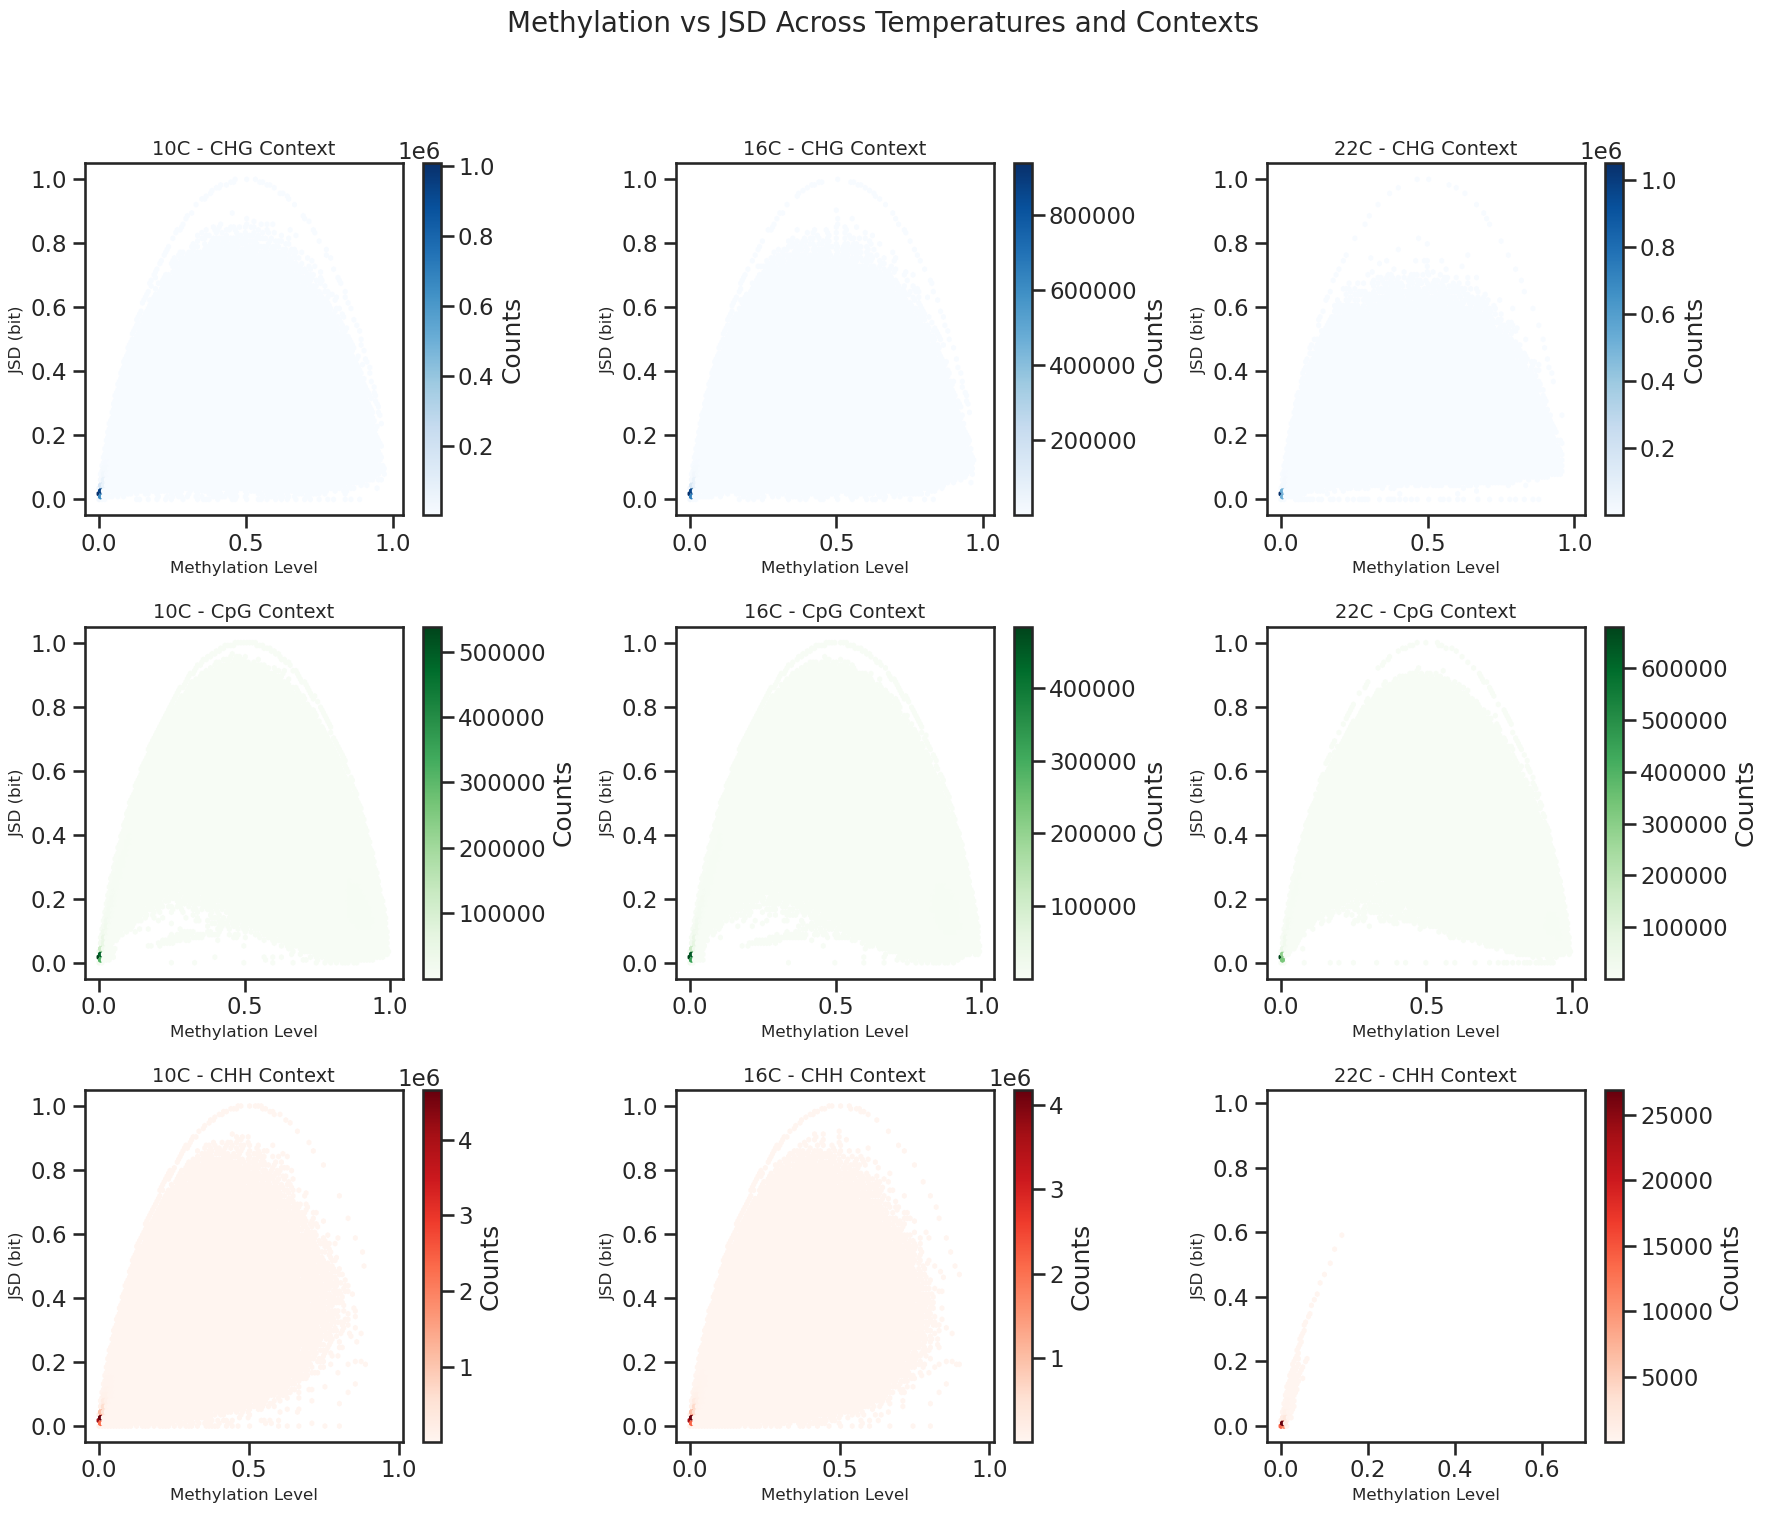

In [66]:
def plot_phase_plane(data, color, title, ax):
    if data.empty:
        print(f"No data available for {title}. Skipping plot.")
        return
    
    if 'JSD_bit_' not in data.columns:
        print(f"'JSD_bit_' column not found in data for {title}. Skipping plot.")
        return
    
    data.rename(columns={'JSD_bit_': 'JSD (bit)'}, inplace=True)
    
    sns.set(style='ticks')
    sns.set_context('talk')
    
    BINS = 'log'
    GRIDSIZE = 100
    MINCNT = 10
    
    hb = ax.hexbin(data['meth'], data['JSD (bit)'], gridsize=GRIDSIZE, cmap=color, mincnt=MINCNT)
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Methylation Level', fontsize=12)
    ax.set_ylabel('JSD (bit)', fontsize=12)
    
    cb = plt.colorbar(hb, ax=ax)
    cb.set_label('Counts')

def plot_all_temps():
    fig, axes = plt.subplots(3, 3, figsize=(18, 16))
    fig.suptitle('Methylation vs JSD Across Temperatures and Contexts', fontsize=20)
    
    for i, temp in enumerate(['10C', '16C', '22C']):
        print(f"\nProcessing data for temperature: {temp}")
        results = {}
        for context in ['CHG', 'CpG', 'CHH']:
            dir_name = f"{context}_{temp}"
            print(f"Processing directory: {dir_name}")
            context_data = process_files(dir_name)
            
            if context in context_data:
                results[context] = context_data[context]
            else:
                print(f"No data found for context {context} in directory {dir_name}.")
        
        # Plotting
        for j, (context, color) in enumerate(zip(['CHG', 'CpG', 'CHH'], ['Blues', 'Greens', 'Reds'])):
            title = f"{temp} - {context} Context"
            ax = axes[j, i]
            if context in results:
                plot_phase_plane(results[context], color, title, ax)
            else:
                print(f"No data available to plot for {title}.")
    
    # Adjust layout
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

plot_all_temps()



Processing data for temperature: 10C
Processing directory: CHG_10C
Processing directory: CpG_10C
Processing directory: CHH_10C

Processing data for temperature: 16C
Processing directory: CHG_16C
Processing directory: CpG_16C
Processing directory: CHH_16C

Processing data for temperature: 22C
Processing directory: CHG_22C
Processing directory: CpG_22C
Processing directory: CHH_22C


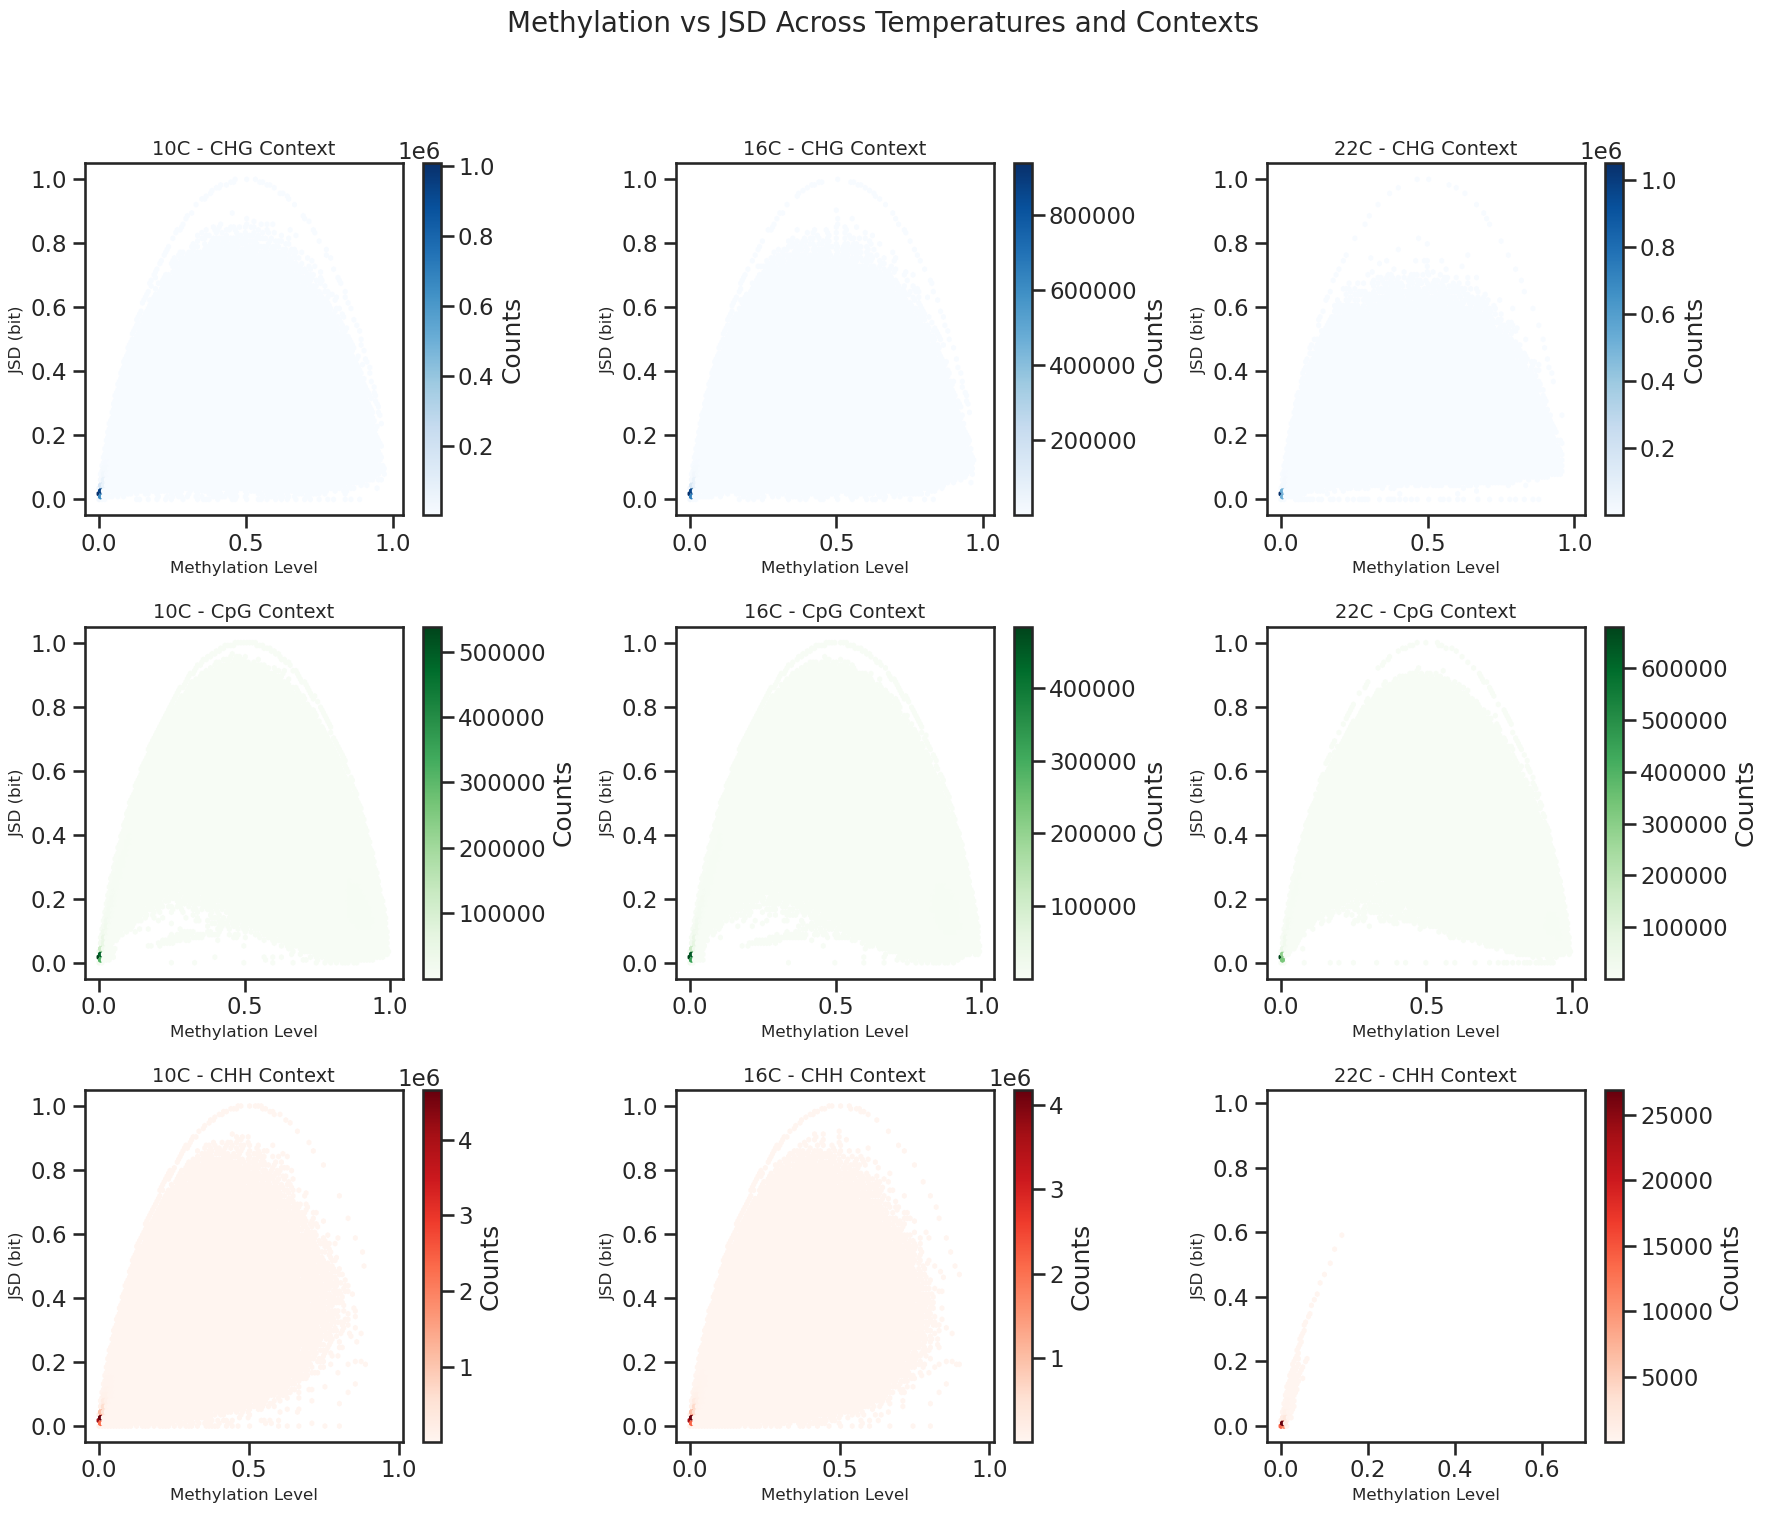

In [67]:
def plot_phase_plane(data, color, title, ax):
    if data.empty:
        print(f"No data available for {title}. Skipping plot.")
        return
    
    if 'JSD_bit_' not in data.columns:
        print(f"'JSD_bit_' column not found in data for {title}. Skipping plot.")
        return
    
    data.rename(columns={'JSD_bit_': 'JSD (bit)'}, inplace=True)
    
    sns.set(style='ticks')
    sns.set_context('talk')

    # Plot hexbin plot using scatterplot and histplot for marginal histograms
    hb = ax.hexbin(data['meth'], data['JSD (bit)'], gridsize=100, cmap=color, mincnt=10)
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Methylation Level', fontsize=12)
    ax.set_ylabel('JSD (bit)', fontsize=12)
    
    # Add colorbar
    cb = plt.colorbar(hb, ax=ax)
    cb.set_label('Counts')
    
def plot_all_temps():
    fig, axes = plt.subplots(3, 3, figsize=(18, 16))
    fig.suptitle('Methylation vs JSD Across Temperatures and Contexts', fontsize=20)
    
    for i, temp in enumerate(['10C', '16C', '22C']):
        print(f"\nProcessing data for temperature: {temp}")
        results = {}
        for context in ['CHG', 'CpG', 'CHH']:
            dir_name = f"{context}_{temp}"
            print(f"Processing directory: {dir_name}")
            context_data = process_files(dir_name)
            
            if context in context_data:
                results[context] = context_data[context]
            else:
                print(f"No data found for context {context} in directory {dir_name}.")
        
        # Plotting
        for j, (context, color) in enumerate(zip(['CHG', 'CpG', 'CHH'], ['Blues', 'Greens', 'Reds'])):
            title = f"{temp} - {context} Context"
            ax = axes[j, i]
            if context in results:
                plot_phase_plane(results[context], color, title, ax)
            else:
                print(f"No data available to plot for {title}.")
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

plot_all_temps()



Processing data for temperature: 10C
Processing directory: CHG_10C
Processing directory: CpG_10C
Processing directory: CHH_10C

Processing data for temperature: 16C
Processing directory: CHG_16C
Processing directory: CpG_16C
Processing directory: CHH_16C

Processing data for temperature: 22C
Processing directory: CHG_22C
Processing directory: CpG_22C
Processing directory: CHH_22C


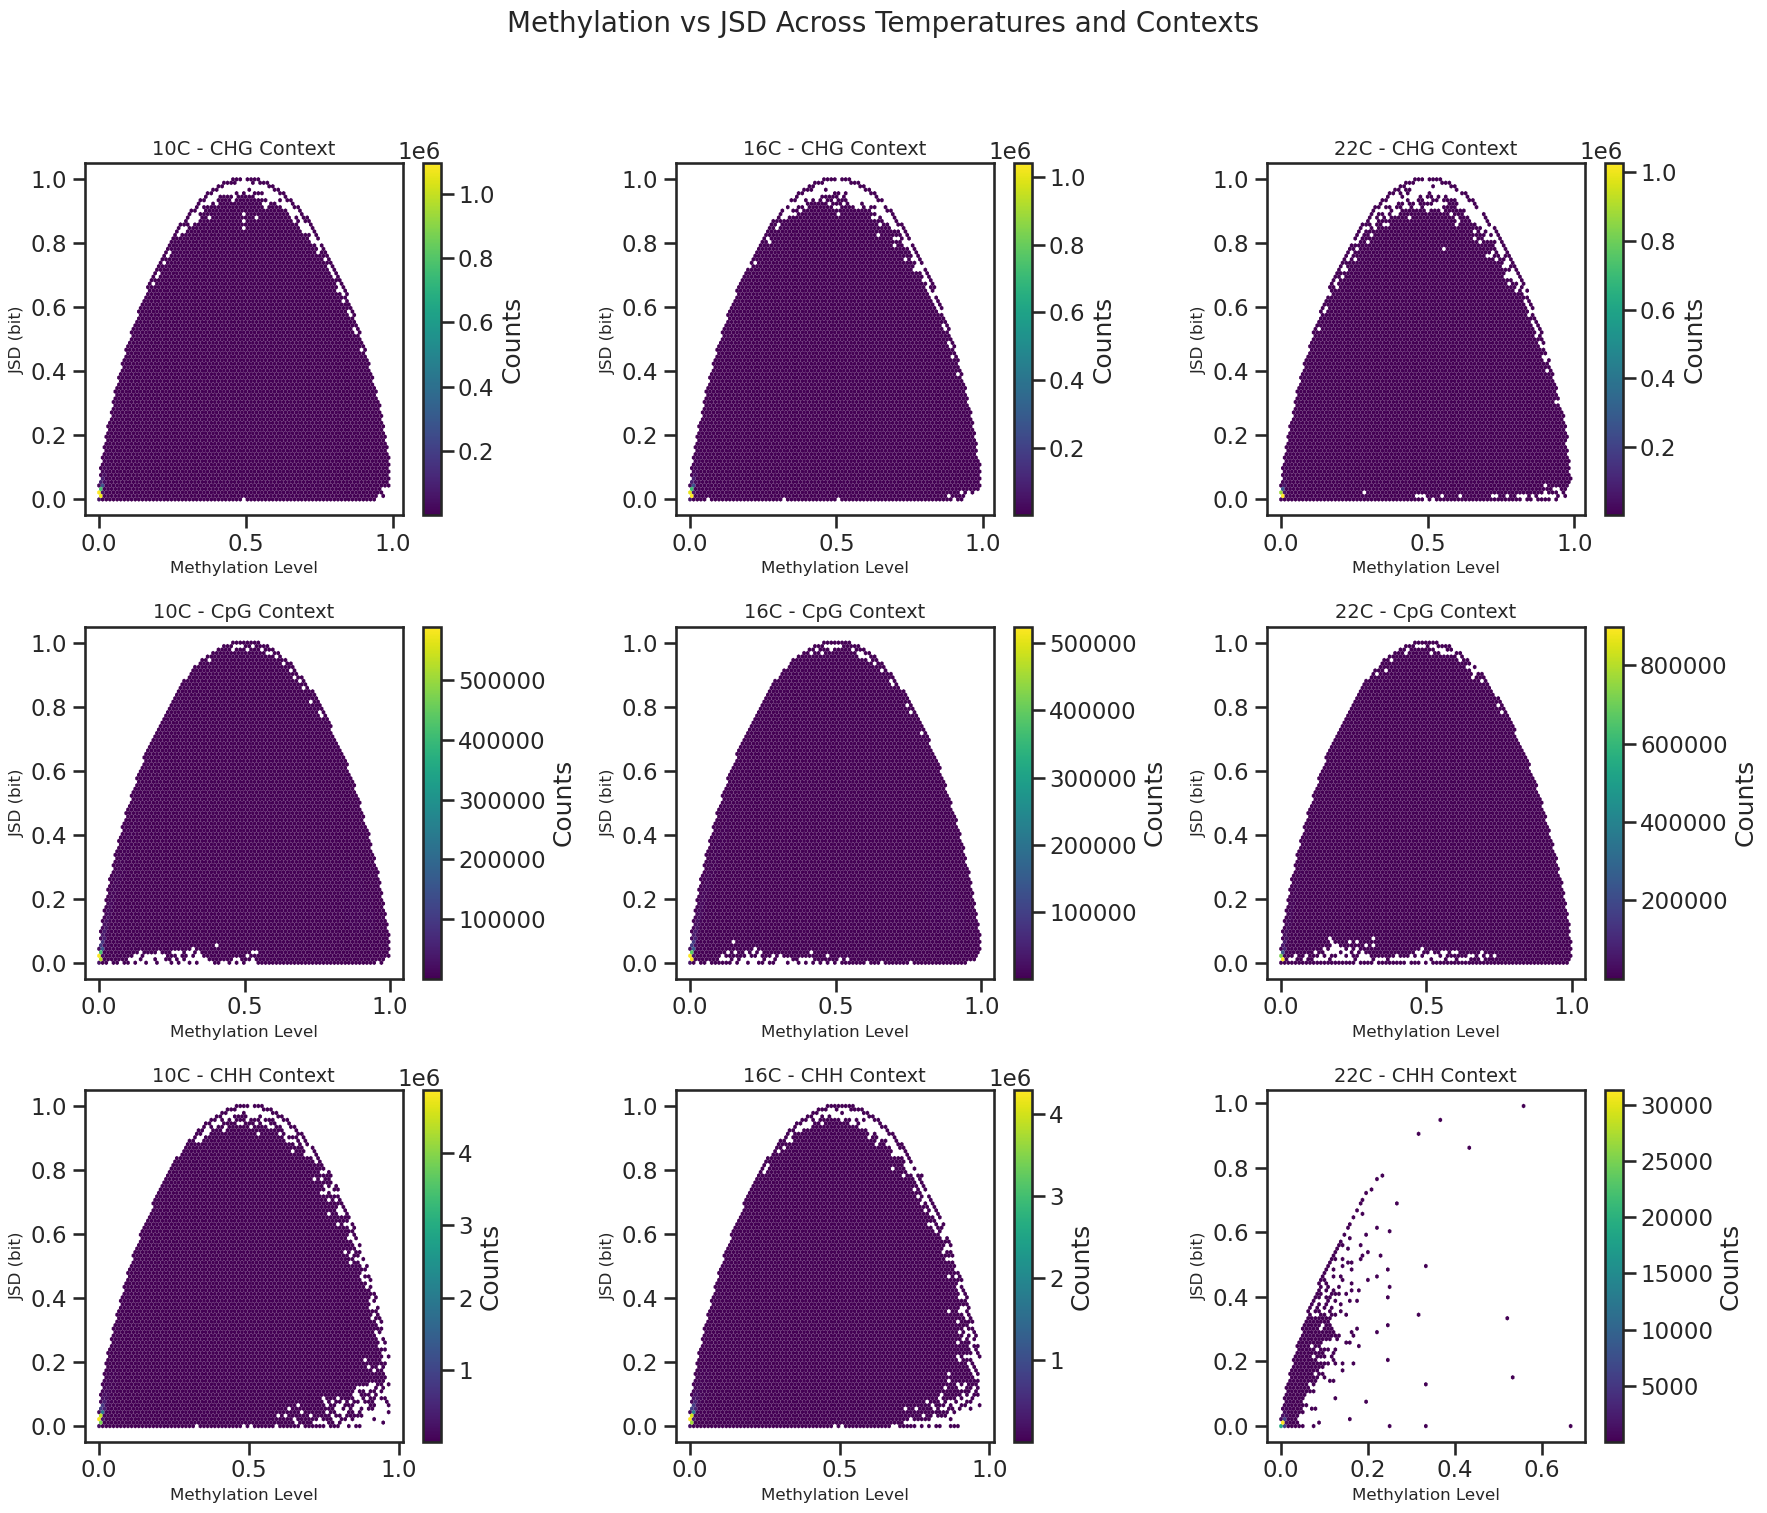

In [68]:
def plot_phase_plane(data, color, title, ax):
    if data.empty:
        print(f"No data available for {title}. Skipping plot.")
        return
    
    if 'JSD_bit_' not in data.columns:
        print(f"'JSD_bit_' column not found in data for {title}. Skipping plot.")
        return
    
    data.rename(columns={'JSD_bit_': 'JSD (bit)'}, inplace=True)
    
    sns.set(style='ticks')
    sns.set_context('talk')

    # Plot hexbin plot using improved color and bin size parameters
    hb = ax.hexbin(data['meth'], data['JSD (bit)'], gridsize=80, cmap='viridis', mincnt=1, edgecolors='none')
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Methylation Level', fontsize=12)
    ax.set_ylabel('JSD (bit)', fontsize=12)
    
    # Add colorbar
    cb = plt.colorbar(hb, ax=ax)
    cb.set_label('Counts')

def plot_all_temps():
    fig, axes = plt.subplots(3, 3, figsize=(18, 16))
    fig.suptitle('Methylation vs JSD Across Temperatures and Contexts', fontsize=20)
    
    for i, temp in enumerate(['10C', '16C', '22C']):
        print(f"\nProcessing data for temperature: {temp}")
        results = {}
        for context in ['CHG', 'CpG', 'CHH']:
            dir_name = f"{context}_{temp}"
            print(f"Processing directory: {dir_name}")
            context_data = process_files(dir_name)
            
            if context in context_data:
                results[context] = context_data[context]
            else:
                print(f"No data found for context {context} in directory {dir_name}.")
        
        # Plotting
        for j, (context, color) in enumerate(zip(['CHG', 'CpG', 'CHH'], ['Blues', 'Greens', 'Reds'])):
            title = f"{temp} - {context} Context"
            ax = axes[j, i]
            if context in results:
                plot_phase_plane(results[context], color, title, ax)
            else:
                print(f"No data available to plot for {title}.")
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

plot_all_temps()



Processing data for temperature: 10C
Processing directory: CHG_10C
Processing directory: CpG_10C
Processing directory: CHH_10C

Processing data for temperature: 16C
Processing directory: CHG_16C
Processing directory: CpG_16C
Processing directory: CHH_16C

Processing data for temperature: 22C
Processing directory: CHG_22C
Processing directory: CpG_22C
Processing directory: CHH_22C


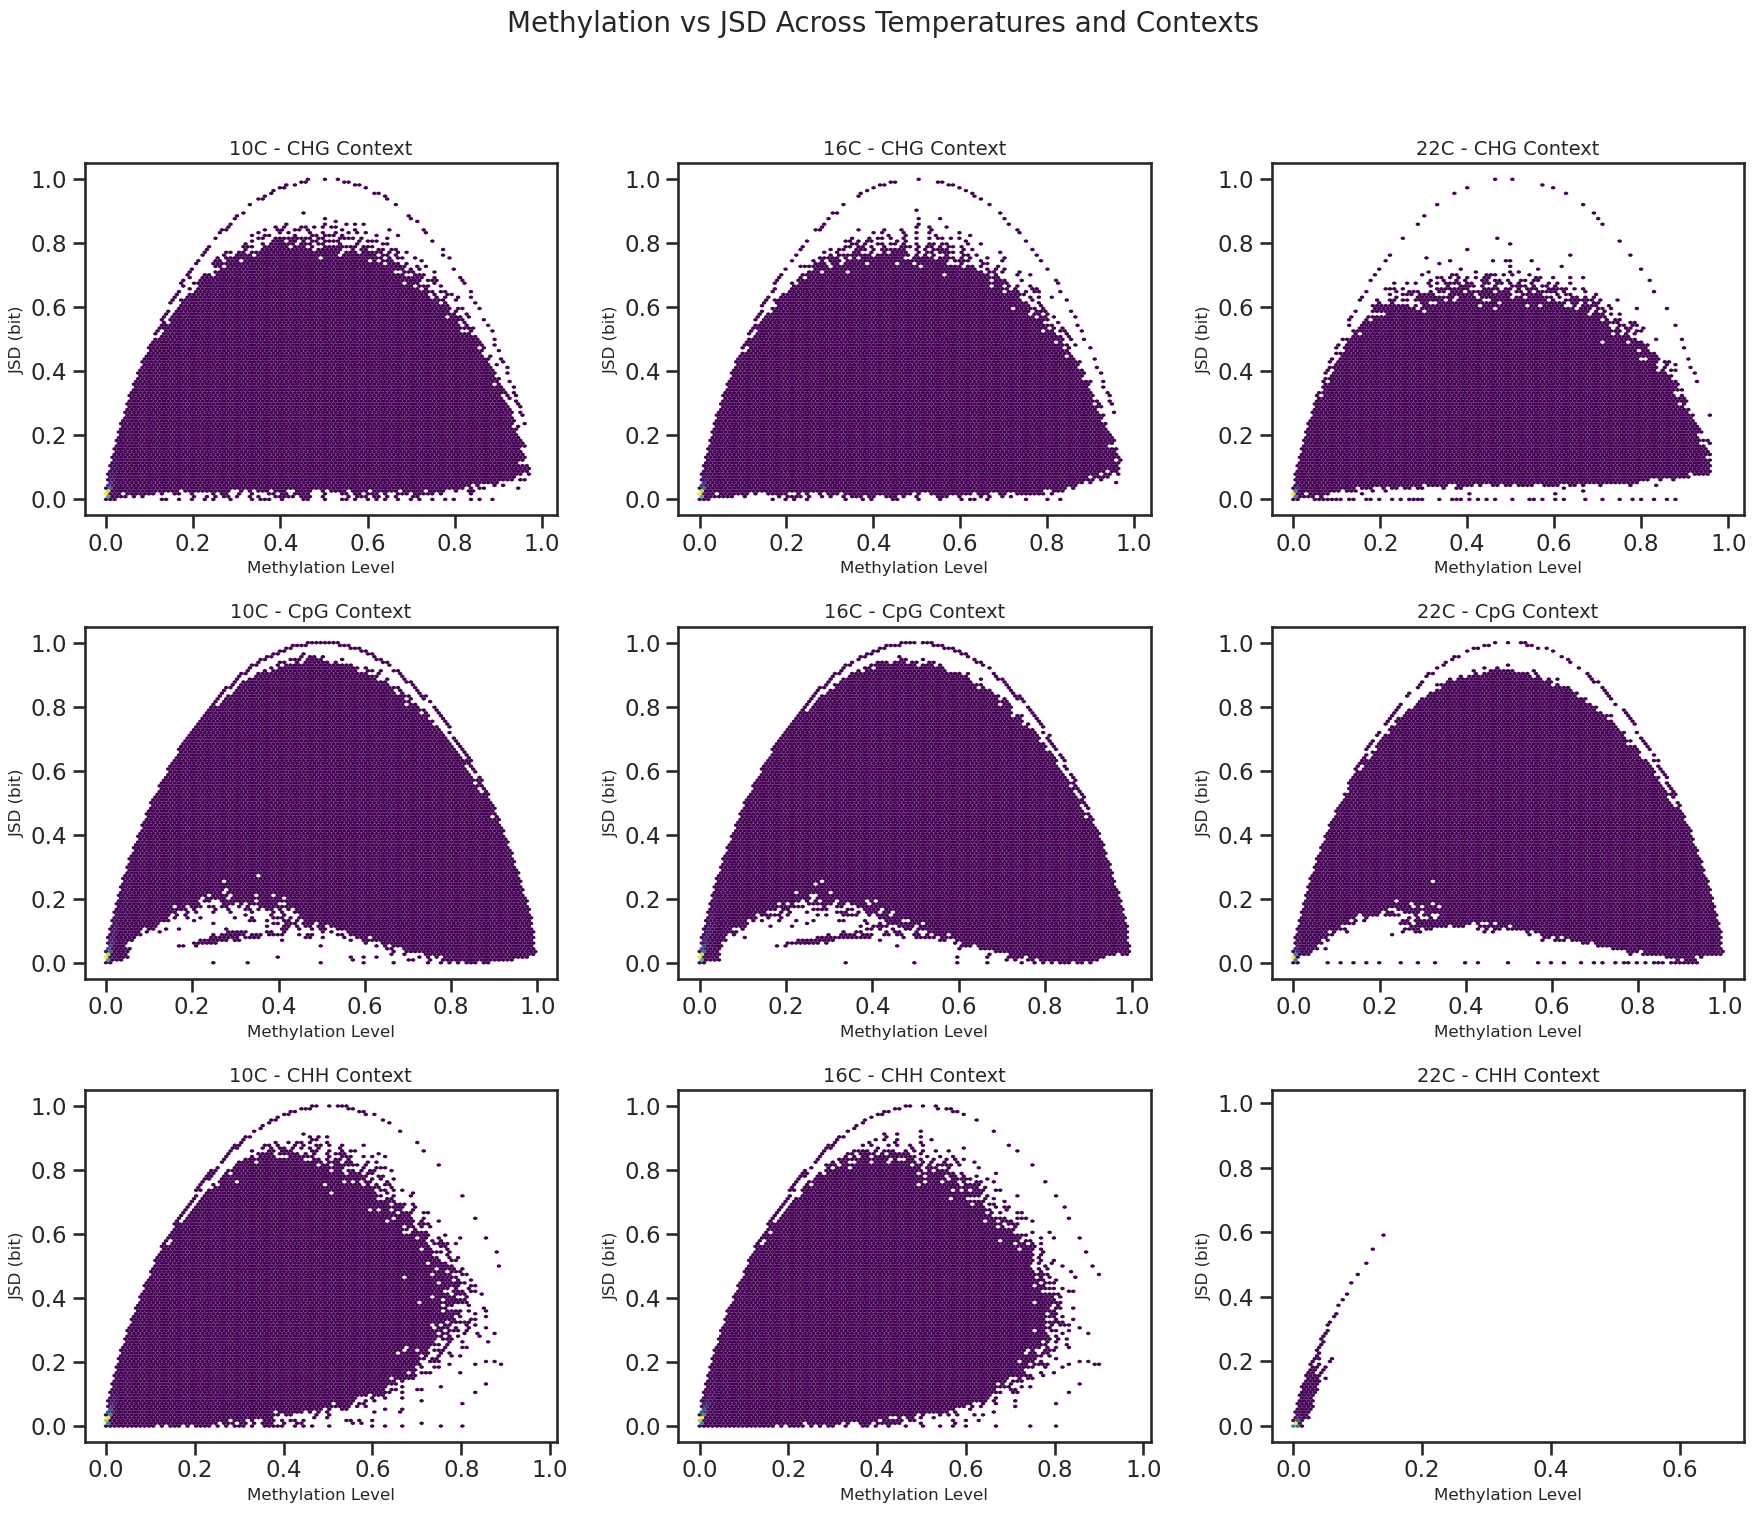

In [82]:
def plot_phase_plane(data, color, title, ax):
    if data.empty:
        print(f"No data available for {title}. Skipping plot.")
        return
    
    if 'JSD_bit_' not in data.columns:
        print(f"'JSD_bit_' column not found in data for {title}. Skipping plot.")
        return
    
    data.rename(columns={'JSD_bit_': 'JSD (bit)'}, inplace=True)
    
    sns.set(style='ticks')
    sns.set_context('talk')

    hb = ax.hexbin(data['meth'], data['JSD (bit)'], gridsize=100, cmap='viridis', mincnt=10, edgecolors='none')

    ax.figure.colorbar(hb, ax=ax, orientation='vertical').remove()

    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Methylation Level', fontsize=12)
    ax.set_ylabel('JSD (bit)', fontsize=12)

def plot_all_temps():
    fig, axes = plt.subplots(3, 3, figsize=(18, 16))
    fig.suptitle('Methylation vs JSD Across Temperatures and Contexts', fontsize=20)
    
    for i, temp in enumerate(['10C', '16C', '22C']):
        print(f"\nProcessing data for temperature: {temp}")
        results = {}
        for context in ['CHG', 'CpG', 'CHH']:
            dir_name = f"{context}_{temp}"
            print(f"Processing directory: {dir_name}")
            context_data = process_files(dir_name)
            
            if context in context_data:
                results[context] = context_data[context]
            else:
                print(f"No data found for context {context} in directory {dir_name}.")
        
        # Plotting
        for j, (context, color) in enumerate(zip(['CHG', 'CpG', 'CHH'], ['blue', 'green', 'red'])):
            title = f"{temp} - {context} Context"
            ax = axes[j, i]
            if context in results:
                plot_phase_plane(results[context], color, title, ax)
            else:
                print(f"No data available to plot for {title}.")
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig("Methylation_vs _JSD_Across_Temperatures_and_Contexts.png", bbox_inches='tight', dpi=300)
    plt.show()

plot_all_temps()

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_phase_plane(data, color, title, ax):
    if data.empty:
        print(f"No data available for {title}. Skipping plot.")
        return
    
    if 'JSD_bit_' not in data.columns:
        print(f"'JSD_bit_' column not found in data for {title}. Skipping plot.")
        return
    
    data.rename(columns={'JSD_bit_': 'JSD (bit)'}, inplace=True)
    
    sns.set(style='ticks')
    sns.set_context('talk')
    
    cmap = plt.get_cmap('viridis')  
    hb = ax.hexbin(data['meth'], data['JSD (bit)'], gridsize=100, cmap=cmap, mincnt=1, bins='log')
    
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Methylation Level', fontsize=12)
    ax.set_ylabel('JSD (bit)', fontsize=12)
    
    cb = plt.colorbar(hb, ax=ax, label='Log Counts')
    cb.set_label('Density (Log Counts)', fontsize=12)

def plot_all_temps():
    fig, axes = plt.subplots(3, 3, figsize=(18, 16))
    fig.suptitle('Methylation vs JSD Across Temperatures and Contexts', fontsize=20)
    
    for i, temp in enumerate(['10C', '16C', '22C']):
        print(f"\nProcessing data for temperature: {temp}")
        results = {}
        for context in ['CHG', 'CpG', 'CHH']:
            dir_name = f"{context}_{temp}"
            print(f"Processing directory: {dir_name}")
            context_data = process_files(dir_name)
            
            if context in context_data:
                results[context] = context_data[context]
            else:
                print(f"No data found for context {context} in directory {dir_name}.")
        
        # Plotting
        for j, (context, color) in enumerate(zip(['CHG', 'CpG', 'CHH'], ['blue', 'green', 'red'])):
            title = f"{temp} - {context} Context"
            ax = axes[j, i]
            if context in results:
                plot_phase_plane(results[context], color, title, ax)
            else:
                print(f"No data available to plot for {title}.")
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()



Processing data for temperature: 10C
Processing directory: CHG_10C
Processing directory: CpG_10C
Processing directory: CHH_10C

Processing data for temperature: 16C
Processing directory: CHG_16C
Processing directory: CpG_16C
Processing directory: CHH_16C

Processing data for temperature: 22C
Processing directory: CHG_22C
Processing directory: CpG_22C
Processing directory: CHH_22C


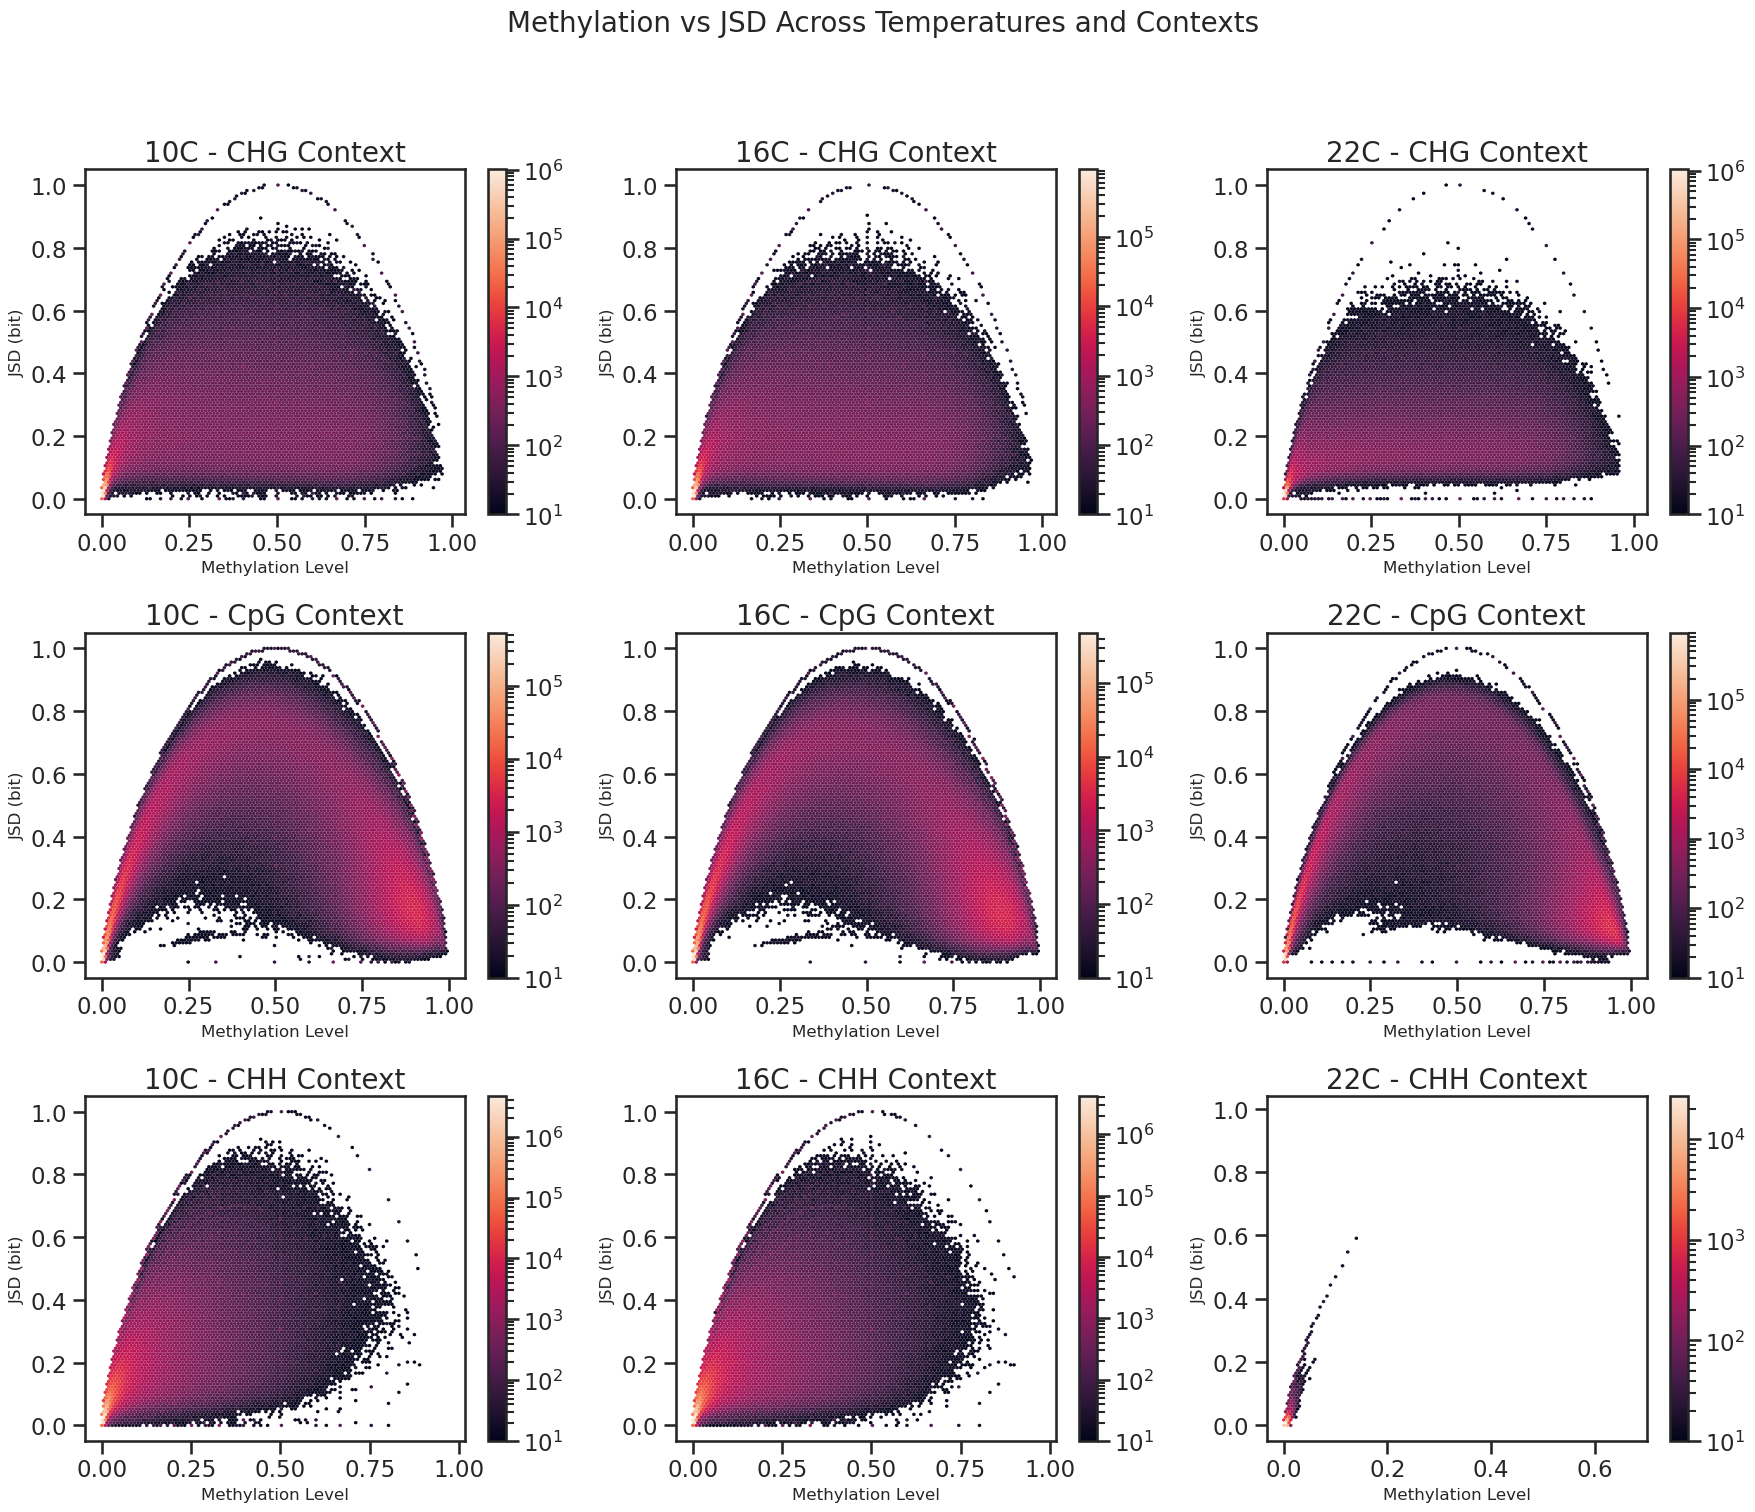

In [88]:
def plot_phase_plane(data, color, title, ax):
    if data.empty:
        print(f"No data available for {title}. Skipping plot.")
        return
    
    if 'JSD_bit_' not in data.columns:
        print(f"'JSD_bit_' column not found in data for {title}. Skipping plot.")
        return
    
    data.rename(columns={'JSD_bit_': 'JSD (bit)'}, inplace=True)
    
    sns.set(style='ticks')
    sns.set_context('talk')

    hb = ax.hexbin(data['meth'], data['JSD (bit)'], gridsize=100, mincnt=10, edgecolors='none', bins = "log")

    
    ax.figure.colorbar(hb, ax=ax, orientation='vertical')

    ax.set_title(title, fontsize=20)
    ax.set_xlabel('Methylation Level', fontsize=12)
    ax.set_ylabel('JSD (bit)', fontsize=12)

def plot_all_temps():
    fig, axes = plt.subplots(3, 3, figsize=(18, 16))
    fig.suptitle('Methylation vs JSD Across Temperatures and Contexts', fontsize=20)
    
    for i, temp in enumerate(['10C', '16C', '22C']):
        print(f"\nProcessing data for temperature: {temp}")
        results = {}
        for context in ['CHG', 'CpG', 'CHH']:
            dir_name = f"{context}_{temp}"
            print(f"Processing directory: {dir_name}")
            context_data = process_files(dir_name)
            
            if context in context_data:
                results[context] = context_data[context]
            else:
                print(f"No data found for context {context} in directory {dir_name}.")
        
        # Plotting
        for j, (context, color) in enumerate(zip(['CHG', 'CpG', 'CHH'], ['blue', 'green', 'red'])):
            title = f"{temp} - {context} Context"
            ax = axes[j, i]
            if context in results:
                plot_phase_plane(results[context], color, title, ax)
            else:
                print(f"No data available to plot for {title}.")
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig("Methylation_vs _JSD_Across_Temperatures_and_Contexts.png", bbox_inches='tight', dpi=300)
    plt.show()

plot_all_temps()